### PACKAGES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### PASSO A PASSO PARA PRATICAR A REGRESSÃO LINEAR UNIVARIADA

    -> 0.0 - Baixar um dataset simples, no kaggle, específico para a prática de regressão linear
    -> 1.0 - Garantir que o dataset possui apenas duas colunas (Feature e Target)
    -> 2.0 - Garantir que não há valores nulos
    -> 3.0 - Plotar um gráfico de dispersão e observar se existe uma tendência linear (para que o estudo faça sentido)
    -> 4.0 - Separar as colunas nas variáveis X (Feature) e Y (Target)
    -> 5.0 - Normalizar X e Y
    -> 6.0 - Definir a função de custo (isso aqui cabe em qualquer lugar, não precisa ser o sexto step)
    -> 7.0 - Definir as derivadas parciais de m (inclinação ou slope) e b (intercepto). (Saber calcular no papel e caneta é essencial pra melhor compreensão)
    -> 8.0 - Implementar a função de descida do gradiente
    -> 9.0 - Definir pontos iniciais, números de iterações e learning rate e rodar a descida do gradiente
    -> 10 - Definir o vetor X com os valores a serem previstos
    -> 11 - Normalizar o vetor X, pra que esteja na mesma dimensão que os dados de treino
    -> 12 - Realizar a previsão, com a famosa fórmula Y = ax + b, e armazenar o resultado em uma variável
    -> 13 - Desnormalizar o vetor de previsão (vetor * desvio padrão do Y + média do Y)
    -> 14 - Plotar um único gráfico com a dispersão inicial de X e Y e os pontos de previsão (de preferência, cada um de uma cor)*

#### 1.0 - Garantir que o dataset possui apenas duas colunas (Feature e Target)

In [3]:
salary_df = pd.read_csv("../data/salary.csv")
salary_df = salary_df[['YearsExperience','Salary']]

salary_df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


#### 2.0 - Garantir que não há valores nulos

In [9]:
salary_df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

#### 3.0 - Plotar um gráfico de dispersão e observar se existe uma tendêncial linear (para que o estudo faça sentido)

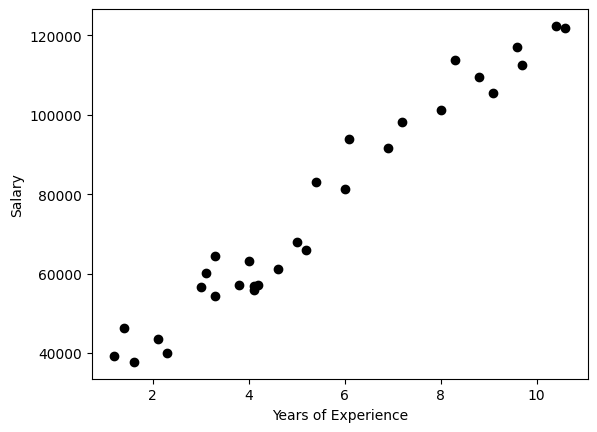

In [7]:
plt.scatter(
    x = salary_df['YearsExperience'],
    y = salary_df['Salary'],
    color = "black"
)

plt.xlabel("Years of Experience")
plt.ylabel("Salary");

#### 4.0 - Separar as colunas nas variáveis X (Feature) e Y (Target)

In [8]:
X = salary_df['YearsExperience']
Y = salary_df['Salary']

#### 5.0 - Normalizar X e Y

In [11]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

#### 6.0 - Definir a função de custo*

In [14]:
# Função de custo 
def E(m, b, X, Y):
    return 1/(2*len(Y))*np.sum((m*X + b - Y)**2)

#### 7.0 Definir as derivadas parciais de m (inclinação ou slope) e b (intercepto). 

In [17]:
def dEdm(m, b, X, Y):
    res = 1/len(Y) * np.dot((m*X + b - Y), X)
    return res

def dEdb(m, b, X, Y):
    res = 1/len(Y) * np.sum(m*X + b - Y)
    return res


#### 8 - Implementar a função de descida do gradiente

In [18]:
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate = 0.001, num_iterations = 1000, print_cost=False):
    for iteration in range(num_iterations):
        
        m_new = m - learning_rate * dEdm(m, b, X, Y)
        b_new = b - learning_rate * dEdb(m, b, X, Y)
        
        m = m_new
        b = b_new
        if print_cost:
            print (f"Cost after iteration {iteration}: {E(m, b, X, Y)}")
        
    return m, b

#### 9.0 - Definir pontos iniciais, números de iterações e learning rate e rodar a descida do gradiente

In [20]:
m_initial = 0; b_initial = 0; num_iterations = 6; learning_rate = 1.2
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial, 
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Gradient descent result: m_min, b_min = {m_gd}, {b_gd}") 

Cost after iteration 0: 0.040660801211115837
Cost after iteration 1: 0.022287233259560536
Cost after iteration 2: 0.021552290541498327
Cost after iteration 3: 0.021522892832775843
Cost after iteration 4: 0.021521716924426934
Cost after iteration 5: 0.02152166988809298
Gradient descent result: m_min, b_min = 0.9781790110251767, -3.996802888650562e-16


#### 10 - Definir o vetor X com os valores a serem previstos (neste caso, um vetor com os anos de experiência, para posterior previsão de salário)



In [22]:
# Estamos falando de anos de experiência, então os números de input precisam ser realistas
X_pred = np.array([3.5, 6, 12])

#### 11 - Normalizar o vetor X, pra que esteja na mesma dimensão que os dados de treino

In [23]:
X_pred_norm = (X_pred - np.mean(X))/np.std(X)

### 12 - Realizar a previsão, com a famosa fórmula Y = ax + b, e armazenar o resultado em uma variável

In [24]:
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd

#### 13 - Desnormalizar o vetor de previsão (vetor * desvio padrão do Y + média do Y)

In [25]:
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

In [27]:
print(f"Years of Experience:\n{X_pred}")
print(f"Predictions of Salary:\n{Y_pred_gd}")

Years of Experience:
[ 3.5  6.  12. ]
Predictions of Salary:
[ 57924.229271    81547.62308067 138243.76822387]


#### 14 - Plotar um único gráfico com a dispersão inicial de X e Y e os pontos de previsão (de preferência, cada um de uma cor)*

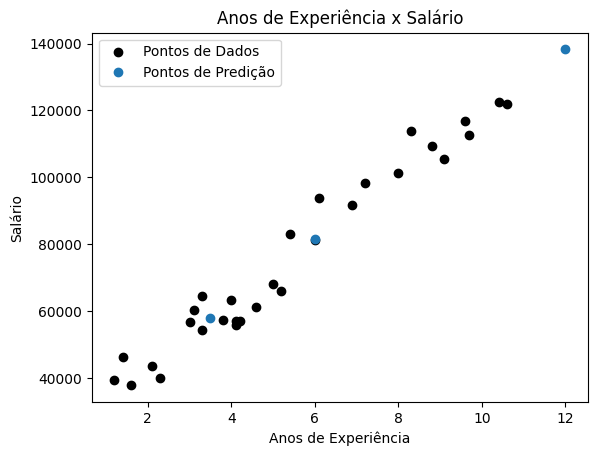

In [56]:
import matplotlib.pyplot as plt

# Plotar os pontos de dados
plt.scatter(X, Y, color="black", label="Pontos de Dados")

# Plotar a linha de predição
plt.plot(X_pred, Y_pred_gd, 'o', label="Pontos de Predição")

# Adicionar rótulos aos eixos
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")

# Adicionar um título ao gráfico
plt.title("Anos de Experiência x Salário")

# Adicionar uma legenda
plt.legend()

# Mostrar o gráfico
plt.show()


Agora é hora de praticar em diversos outros datasets. Quando o processo inteiro estiver na ponta da língua, ou melhor, na ponta dos dedos, é hora de avançar para regressão linear multivariada.